In [1]:
import glob
import os

def glob_files(path, file_type="*"):
    search_string = os.path.join(path, file_type)
    files = glob.glob(search_string)

    # print('searching ', path)
    paths = []
    for f in files:
      if os.path.isdir(f):
        sub_paths = glob_files(f + '/')
        paths += sub_paths
      else:
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

In [2]:
import cv2
import numpy as np

IMAGE_SIZE = 600

def load_images(path):
  files = glob_files(path, "*.png")

  # print(files)
  X_data = []
  for file in files:
    image = cv2.imread(file)
    # print(image.shape)
    # x = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    X_data.append(image)
    
  return np.array(X_data)

X_test = load_images("highway/valid/image/Suwon_CH01_20200720_1830_MON_9m_RH_highway_TW5_sunny_FHD/")

In [15]:
X_test.shape

(150, 1920, 1080, 3)

In [5]:
X_test[0].shape

(1920, 1080, 3)

넘파이 shape이므로 행 수(세로 길이), 열 수(가로 길이), depth 수!

In [20]:
WIDTH = 1080
HEIGHT = 1920

def load_labels(path):
  files = glob_files(path, "*.txt")

  Y_data = []
  for file in files:
    with open(file) as f:
      lines = f.readlines()

      boxes = []
      for line in lines:
        tokens = line.split()

        class_id = int(tokens[0])
        xc = float(tokens[1]) * WIDTH
        yc = float(tokens[2]) * HEIGHT
        width = float(tokens[3]) * WIDTH
        height = float(tokens[4]) * HEIGHT

        boxes.append(np.array([class_id, xc, yc, width, height]))
        # print(class_id, xc, yc, width, height)

      Y_data.append(np.array(boxes))
      # print(lines)
  return Y_data  ## 이미지마다 탐지 대상 개수가 달라서(행 개수가 달라서) 정해진 shape의 넘파이 어레이로 변환할 수 없다! 변환하려면 패딩 등이 필요.

Y_test = load_labels("highway/valid/label/Suwon_CH01_20200720_1830_MON_9m_RH_highway_TW5_sunny_FHD/")

In [21]:
Y_test[0].shape

(32, 5)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_patch_rectangle(y, color):
  # # in yolov5
  width = int(y[2])
  height = int(y[3])
  return patches.Rectangle((int(y[0] - width/2), int(y[1] - height/2)),
                           width, height,
                           edgecolor=color, fill=False)

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]  ## car는 green, bus는 r + g(yellow?), truck은 red

def plot_image(image, boxes, axis):
  # # print(boxes.shape)
  for box in boxes:
    # print(box)
    class_id = int(box[0])
    # print(type(class_id), class_id)
    rect = create_patch_rectangle(box[1:], COLORS[class_id])
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images(X, Y, limit=10):
  fig = plt.figure(figsize=(100, 80))

  last_id = min(limit, X.shape[0])
  for id in range(last_id):
    axis = fig.add_subplot(5, 3, id + 1)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], Y[id], axis)

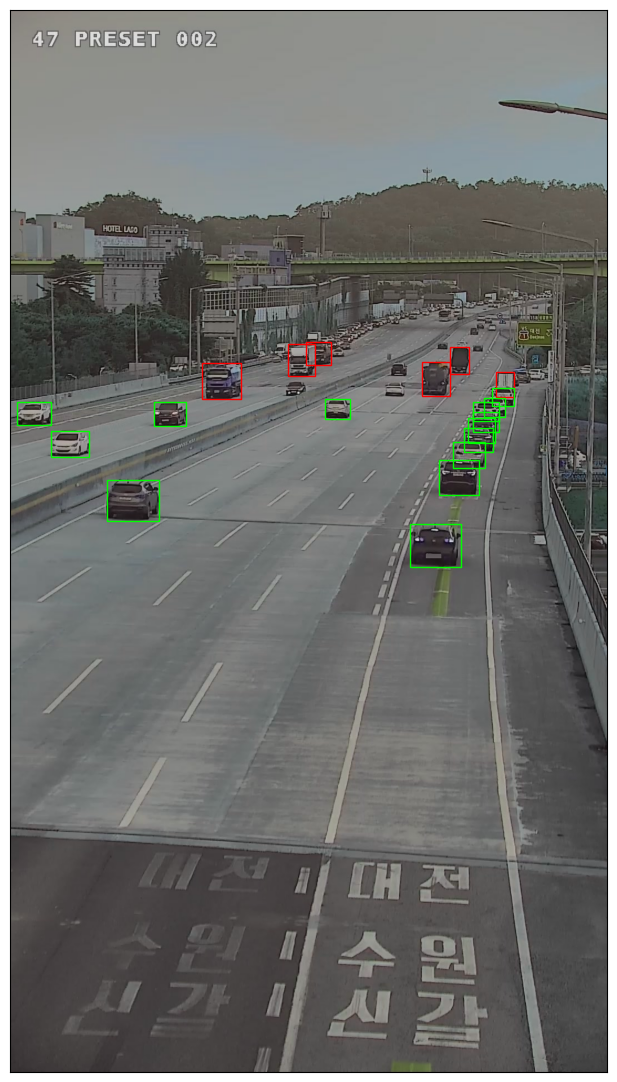

In [23]:
plot_images(np.array([X_test[-1]]), np.array([Y_test[-1]]))

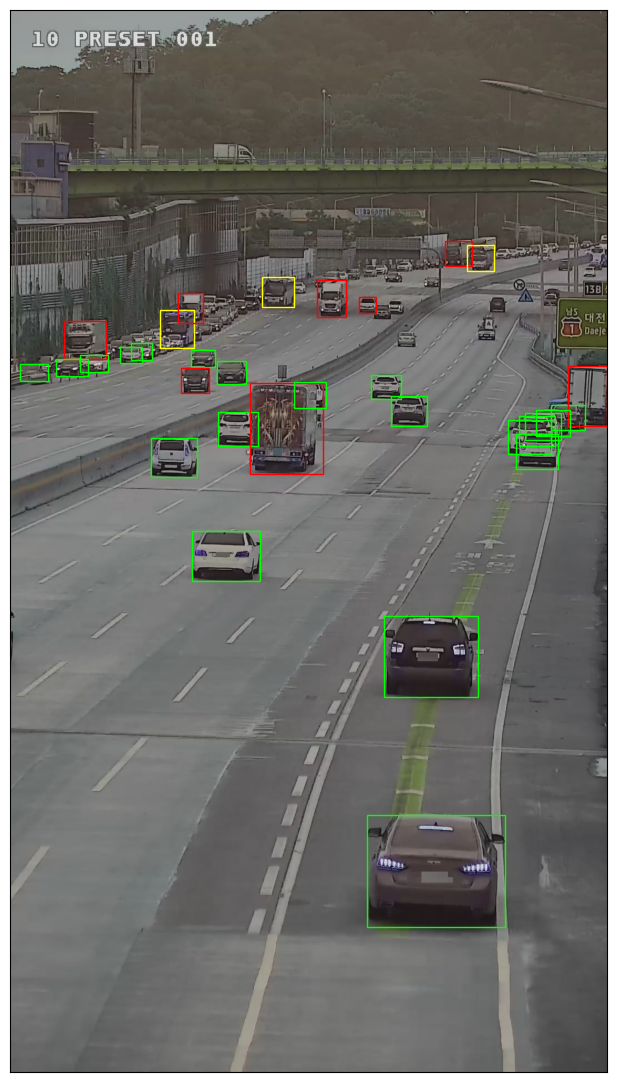

In [24]:
plot_images(np.array([X_test[0]]), np.array([Y_test[0]]))